# Part 8: API

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Python.svg/800px-Python.svg.png" alt="drawing" width="250"/>

## 8.1 What's an API?

API stands for Application Programming Interface. In simple terms, APIs can be thought of as a middleman between the backend (data owner) and the client (data consumer). When the client wants to communicate with another, it sends a request to the API, which then processes the request and sends a response back. APIs enable software applications to exchange data and functionality seamlessly, without requiring the developers to understand the underlying implementation details.

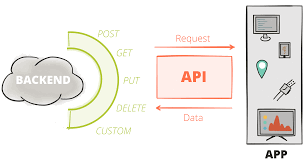



## 8.2 Rest API

There are several types of APIs, to keep it simple during the session we're only going to work with rest APIs. Representational State Transfer (REST) APIs are a type of web API that uses HTTP requests to interact with data. REST APIs are popular because they are flexible, scalable, and easy to use. They are widely used in web development and mobile app development.

To communicate with the API we can use HTTP methods:

- GET: The GET method is used to retrieve data from the server. When a client sends a GET request, the server responds with a representation of the requested resource, usually in the form of JSON or XML.


- POST: The POST method is used to create new data on the server. When a client sends a POST request, the server creates a new resource and returns a representation of the newly created resource in the response.


- PUT: The PUT method is used to update existing data on the server. When a client sends a PUT request, the server updates the specified resource with the new data provided by the client and returns a representation of the updated resource in the response.


- PATCH: The PATCH method is similar to the PUT method, but it only updates a portion of the specified resource, rather than replacing the entire resource. This can be useful when updating large resources that would be inefficient to replace entirely.


- DELETE: The DELETE method is used to delete a resource on the server. When a client sends a DELETE request, the server deletes the specified resource and returns a response indicating the success or failure of the operation.

## 8.3 API calls in Python

To make API calls in Python the most common way is by using a library called **requests**. For our example we're going to use an API called [Pokeapi](https://pokeapi.co/docs/v2):

Let's supose we want to know information about a specific Pokemon, then we will need to use a **get method** to the [Pokemon's endpoint](https://pokeapi.co/docs/v2#pokemon).

In [3]:
import requests

In [6]:
#We can think that endpoints are specific sections to get the information
pokemon_id = 1
end_point = "https://pokeapi.co/api/v2/pokemon/{}/".format(pokemon_id)

In [7]:
answer = requests.get(end_point)

In [8]:
type(answer)

requests.models.Response

In [9]:
print(answer)

<Response [200]>


### Status code

If you print the API response, you'll get a numeric code. That's because Wwen a client sends a request to a RESTful API, the server responds with an HTTP status code, which indicates the success or failure of the operation. The following are the most commonly used HTTP status codes in RESTful APIs:

**200 OK**: The server successfully processed the request and returned the requested data in the response.

**201 Created**: The server successfully processed the request and created a new resource, which is included in the response.

**204 No Content**: The server successfully processed the request, but there is no data to return in the response.

**400 Bad Request**: The request was malformed or invalid, and the server cannot process the request.

**401 Unauthorized**: The client needs to authenticate itself to access the requested resource.

**403 Forbidden**: The client does not have permission to access the requested resource.

**404 Not Found**: The server cannot find the requested resource.

**500 Internal Server Error**: The server encountered an unexpected error while processing the request.

**503 Service Unavailable**: The server is currently unable to handle the request due to a temporary overload or maintenance.

In [12]:
#To consume the proper information we need to transform the API response to jon (you can think that json is like a dictionary)
answer_json = answer.json()

In [13]:
print(answer_json)

{'abilities': [{'ability': {'name': 'overgrow', 'url': 'https://pokeapi.co/api/v2/ability/65/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'chlorophyll', 'url': 'https://pokeapi.co/api/v2/ability/34/'}, 'is_hidden': True, 'slot': 3}], 'base_experience': 64, 'forms': [{'name': 'bulbasaur', 'url': 'https://pokeapi.co/api/v2/pokemon-form/1/'}], 'game_indices': [{'game_index': 153, 'version': {'name': 'red', 'url': 'https://pokeapi.co/api/v2/version/1/'}}, {'game_index': 153, 'version': {'name': 'blue', 'url': 'https://pokeapi.co/api/v2/version/2/'}}, {'game_index': 153, 'version': {'name': 'yellow', 'url': 'https://pokeapi.co/api/v2/version/3/'}}, {'game_index': 1, 'version': {'name': 'gold', 'url': 'https://pokeapi.co/api/v2/version/4/'}}, {'game_index': 1, 'version': {'name': 'silver', 'url': 'https://pokeapi.co/api/v2/version/5/'}}, {'game_index': 1, 'version': {'name': 'crystal', 'url': 'https://pokeapi.co/api/v2/version/6/'}}, {'game_index': 1, 'version': {'name': 'ruby', 

In [19]:
print("Name:", answer_json['name'])
print("Weigh:", answer_json['weight'])
print("Species:", answer_json['species'])
print("Type", answer_json["types"])

Name: bulbasaur
Weigh: 69
Species: {'name': 'bulbasaur', 'url': 'https://pokeapi.co/api/v2/pokemon-species/1/'}
Type [{'slot': 1, 'type': {'name': 'grass', 'url': 'https://pokeapi.co/api/v2/type/12/'}}, {'slot': 2, 'type': {'name': 'poison', 'url': 'https://pokeapi.co/api/v2/type/4/'}}]


In [24]:
for t in answer_json["stats"]:
    print(t)

{'base_stat': 45, 'effort': 0, 'stat': {'name': 'hp', 'url': 'https://pokeapi.co/api/v2/stat/1/'}}
{'base_stat': 49, 'effort': 0, 'stat': {'name': 'attack', 'url': 'https://pokeapi.co/api/v2/stat/2/'}}
{'base_stat': 49, 'effort': 0, 'stat': {'name': 'defense', 'url': 'https://pokeapi.co/api/v2/stat/3/'}}
{'base_stat': 65, 'effort': 1, 'stat': {'name': 'special-attack', 'url': 'https://pokeapi.co/api/v2/stat/4/'}}
{'base_stat': 65, 'effort': 0, 'stat': {'name': 'special-defense', 'url': 'https://pokeapi.co/api/v2/stat/5/'}}
{'base_stat': 45, 'effort': 0, 'stat': {'name': 'speed', 'url': 'https://pokeapi.co/api/v2/stat/6/'}}


## Exercice break
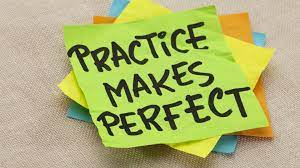


##### Exercice: Create pokemons

1. Create a class named Pokemon that will contain the name, weight and stats of the pokemon (all attributes should be empty).
2. Add a method that takes the pokemon id and updates the attributes based on the information recieved from pokeapi
3. If the API response code is not 200 you should get a warning message.
4. If the API response (json) doesn't have a specific field, it should fullfill the missing values with 0

**Hint**: All the information can be recieved from the same pokemon endpoint. You only need to use stat's name as attribute's name and base_stat as attribute's value.

In [ ]:
#Example

pikachu = Pokemon()
pikachu.get_data(25)